# INFORMACIÓN DEL PROYECTO

### TÍTULO

In [1]:
#Convertion Funnel Optimization Google Merch.

### TEMA

In [2]:
#Este proyecto consiste en analizar el embudo de conversión de ventas de un E-commerce (Google Merch) crear estrategias de marketing con el fin de incrementar las ventas.

### HIPÓTESIS

Define aquí lo que será la hipótesis de tu proyecto.
Puede que tengas más de una, pero tu proyecto lo harás teniendo una principal hipótesis.

In [3]:
# HIPOTESIS 1: Los usuarios que interactúan frecuentemente con la funcionalidad 'add_to_cart' pero no completan una compra puede ser una oportunidad para la empresa de incentivar a estos usuarios con campañas de retargeting enfocadas en descuentos o promociones específicas.

## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

Incluye aquí una breve descripción del dataset o datasets de los que partirás para poder evaluar tu hipótesis.
También incluye el origen de estos datos y su fuente:

events1.csv: Incluye eventos especificos del usuario en la tienda online. Lo que me permitirá mapear los recorridos de los usuarios en el embudo de conversión, identificar las acciones previas al abandono del carrito o a la compra, y analizar la frecuencia y secuencia de eventos clave.

item.csv: Contiene detalles de productos como el nombre, marca o categorías de productos. Este archivo me ayudará a entender que productos o categorías de productos tienen mayor conversión o tienen un alto porcentaje de rebote. Esto es útil para segmentar usuarios en función del tipo de producto de interés y poder crear estrategias personalizadas de marketing para esos usuarios.

users.csv: Contiene información de usuarios (ID, LTV y fecha de registro). Me servirá para buscar patronces de comportamiento de los usuarios.


Muestra mediante un head() los principales datasets con los que vas a trabajar

In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import os


In [4]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


In [67]:
import pandas as pd

# Cargamos el archivo de eventos
events_data = pd.read_csv('/Users/joseluissenaarbona/Desktop/EDA/events_merch.csv')

# Dividir la columna en subcolumnas
events_data[['user_id', 'ga_session_id', 'country', 'device', 'type', 'item_id', 'date']] = \
    events_data['user_id;ga_session_id;country;device;type;item_id;date'].str.split(';', expand=True)

# Filtrar solo los eventos de tipo 'purchase'
purchase_events = events_data[events_data['type'] == 'purchase']

# Contar las compras por país y seleccionar los 3 primeros
top_countries = purchase_events['country'].value_counts().head(5)

# Mostrar el resultado
print("Ranking de los 3 países con más compras:")
top_countries.reset_index()


Ranking de los 3 países con más compras:


,country,count
0,US,6849
1,IN,1462
2,CA,1361
3,GB,457
4,ES,384


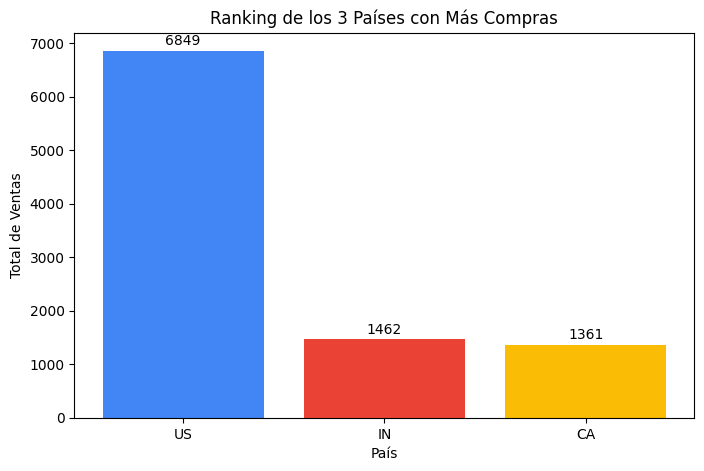

In [68]:
import matplotlib.pyplot as plt

# Datos de los 3 países con más compras
countries = ['US', 'IN', 'CA']
sales = [6849, 1462, 1361]

# Colores corporativos de Google
google_colors = ["#4285F4", "#EA4335", "#FBBC05"]  # Azul, Rojo, Amarillo

# Crear la gráfica de barras con los colores de Google
plt.figure(figsize=(8, 5))
bars = plt.bar(countries, sales, color=google_colors)
plt.xlabel("País")
plt.ylabel("Total de Ventas")
plt.title("Ranking de los 3 Países con Más Compras")

# Añadir el número total en cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

plt.show()


In [96]:

events_data = pd.read_csv('/Users/joseluissenaarbona/Desktop/EDA/events_merch.csv')

events_data[['user_id', 'ga_session_id', 'country', 'device', 'type', 'item_id', 'date']] = \
    events_data['user_id;ga_session_id;country;device;type;item_id;date'].str.split(';', expand=True)

users_add_to_cart = events_data[events_data['type'] == 'add_to_cart']['user_id'].unique()

users_purchase = events_data[events_data['type'] == 'purchase']['user_id'].unique()

users_no_purchase = set(users_add_to_cart) - set(users_purchase)

total_no_purchase = len(users_no_purchase)

print(f"Total de usuarios que añadieron al carrito pero no compraron: {total_no_purchase}")


Total de usuarios que añadieron al carrito pero no compraron: 9893


In [63]:

events_data = pd.read_csv('/Users/joseluissenaarbona/Desktop/EDA/events_merch.csv')

events_data[['user_id', 'ga_session_id', 'country', 'device', 'type', 'item_id', 'date']] = \
    events_data['user_id;ga_session_id;country;device;type;item_id;date'].str.split(';', expand=True)

users_purchase = events_data[events_data['type'] == 'purchase']['user_id'].unique()
total_users_purchase = len(users_purchase)

print(f"Total de usuarios que han comprado al menos una vez: {total_users_purchase}")


Total de usuarios que han comprado al menos una vez: 4066


In [64]:

events_data = pd.read_csv('/Users/joseluissenaarbona/Desktop/EDA/events_merch.csv')

events_data[['user_id', 'ga_session_id', 'country', 'device', 'type', 'item_id', 'date']] = \
    events_data['user_id;ga_session_id;country;device;type;item_id;date'].str.split(';', expand=True)


users_add_to_cart = events_data[events_data['type'] == 'add_to_cart']['user_id'].unique()

users_purchase = events_data[events_data['type'] == 'purchase']['user_id'].unique()

users_add_and_purchase = set(users_add_to_cart).intersection(set(users_purchase))

total_add_and_purchase = len(users_add_and_purchase)

print(f"Total de usuarios que añadieron al carrito y luego compraron: {total_add_and_purchase}")


Total de usuarios que añadieron al carrito y luego compraron: 2652


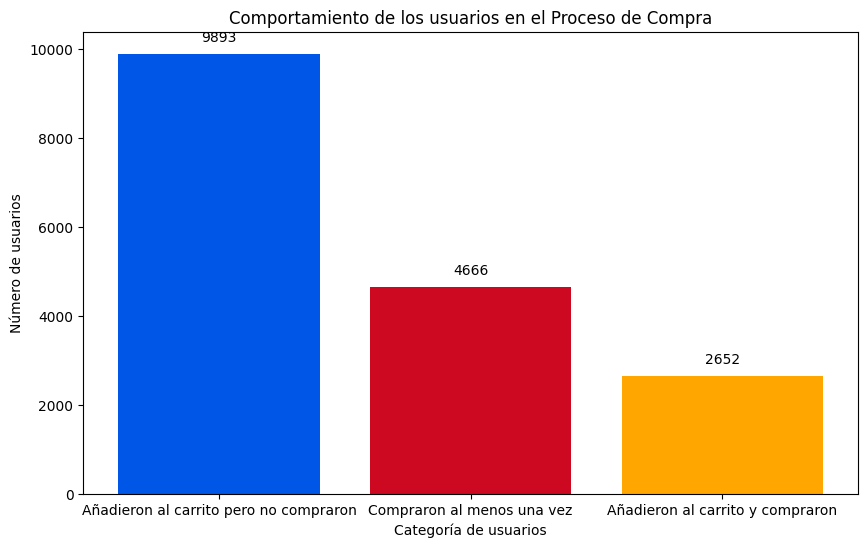

In [104]:
categories = [
    "Añadieron al carrito pero no compraron",
    "Compraron al menos una vez",
    "Añadieron al carrito y compraron"
]
values = [9893, 4666, 2652]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=["#0057e7", "#cc0921", "#ffa700"])
plt.xlabel("Categoría de usuarios")
plt.ylabel("Número de usuarios")
plt.title("Comportamiento de los usuarios en el Proceso de Compra")


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 200, int(yval), ha='center', va='bottom')

plt.show()


In [6]:

top_10_ATC_users = add_to_cart_clics.nlargest(10, 'add_to_cart_count')['user_id']

# Paso 2: Filtrar el dataset original para obtener eventos de "purchase" de estos 10 usuarios
purchase_events_top_10 = data[(data['user_id'].isin(top_10_ATC_users)) & (data['type'] == 'purchase')]

# Paso 3: Contar el número de compras realizadas por cada uno de estos usuarios
purchase_counts_top_10 = purchase_events_top_10['user_id'].value_counts().reset_index()
purchase_counts_top_10.columns = ['user_id', 'purchase_count']

# Resultado
purchase_counts_top_10.head(11)


,user_id,purchase_count
0,5644,21
1,22314,20
2,31259,19
3,26831,15
4,7398,13
5,18702,9
6,21914,8
7,25730,8
8,18764,8


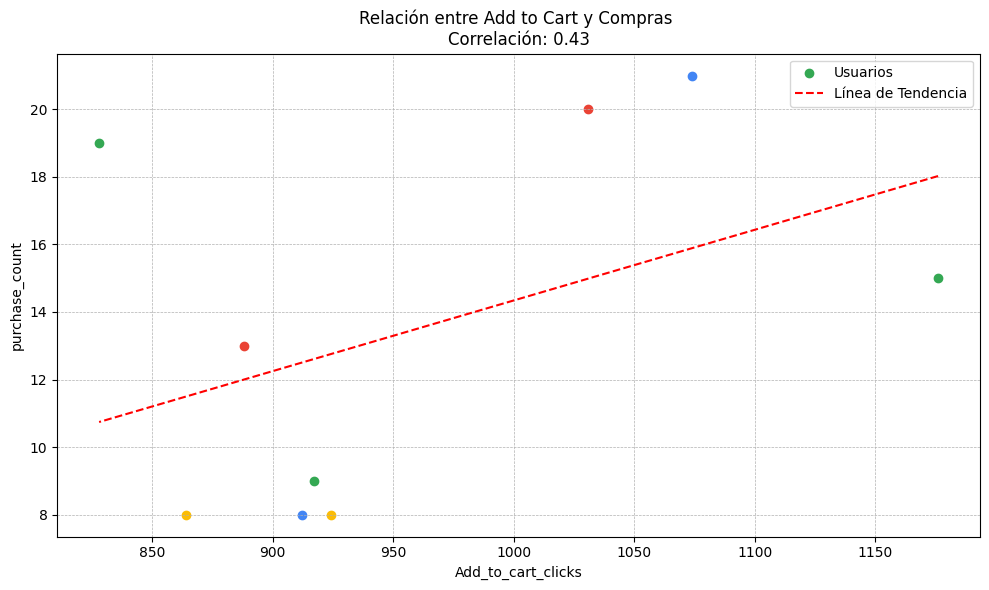

In [52]:
correlation_top_10 = np.corrcoef(top_10_combined['add_to_cart_count'], top_10_combined['purchase_count'])[0, 1]


plt.figure(figsize=(10, 6))


google_colors = ["#34A853", "#4285F4", "#EA4335", "#FBBC05"]

for i in range(len(top_10_combined)):
    plt.scatter(
        top_10_combined['add_to_cart_count'].iloc[i],
        top_10_combined['purchase_count'].iloc[i],
        color=google_colors[i % len(google_colors)],
        label='Usuarios' if i == 0 else ""
    )


plt.xlabel('Add_to_cart_clicks')
plt.ylabel('purchase_count')

plt.title(f'Relación entre Add to Cart y Compras \nCorrelación: {correlation_top_10:.2f}')

z = np.polyfit(top_10_combined['add_to_cart_count'], top_10_combined['purchase_count'], 1)
p = np.poly1d(z)
plt.plot(top_10_combined['add_to_cart_count'], p(top_10_combined['add_to_cart_count']), "r--", label='Línea de Tendencia')

plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [36]:
correlation= np.corrcoef(top_10_combined['add_to_cart_count'], top_10_combined['purchase_count'])[0, 1]
print("Correlación:", correlation)


Correlación: 0.4292652040394182


In [40]:
print("Columnas en events_data:", events_data.columns)
print("Columnas en products_data:", products_data.columns)


Columnas en events_data: Index(['purchase_date', 'purchase_day', 'purchase_hour'], dtype='object')
Columnas en products_data: Index(['id', 'name', 'brand', 'variant', 'category', 'price_in_usd'], dtype='object')


In [22]:

events_path = '/Users/joseluissenaarbona/Desktop/EDA/events1 (1).csv'
events_data = pd.read_csv(events_path)

# Filter for 'purchase' events only
purchase_data = events_data[events_data['type'] == 'purchase'].copy()
purchase_data



,user_id,ga_session_id,country,device,type,item_id,date
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44
52,20120,17424,CA,desktop,purchase,423,2020-11-01 04:11:11
...,...,...,...,...,...,...,...
755271,8321,5123,US,desktop,purchase,646,2021-01-30 21:35:18
755272,8321,5123,US,desktop,purchase,77,2021-01-30 21:35:18
755273,27900,3149,US,mobile,purchase,148,2021-01-30 21:38:13
755274,27900,3149,US,mobile,purchase,194,2021-01-30 21:38:13


In [28]:
purchase_summary.to_csv('/Users/joseluissenaarbona/Desktop/EDA/events1 (1).csv', index=False)


In [31]:
print(events_data.columns)

Index(['purchase_date', 'purchase_day', 'purchase_hour'], dtype='object')


In [86]:
events_data = pd.read_csv('/Users/joseluissenaarbona/Desktop/EDA/events_merch.csv')

events_data[['user_id', 'ga_session_id', 'country', 'device', 'type', 'item_id', 'date']] = \
    events_data['user_id;ga_session_id;country;device;type;item_id;date'].str.split(';', expand=True)

device_types = events_data['device'].unique()
device_types_count = len(device_types)

print("Tipos de dispositivos:", device_types)
print("Cantidad de tipos de dispositivos:", device_types_count)


Tipos de dispositivos: ['mobile' 'desktop' 'tablet']
Cantidad de tipos de dispositivos: 3


In [88]:
import pandas as pd

# Cargar los datos de eventos
events_data = pd.read_csv('/Users/joseluissenaarbona/Desktop/EDA/events_merch.csv')

# Dividir la columna única en subcolumnas
events_data[['user_id', 'ga_session_id', 'country', 'device', 'type', 'item_id', 'date']] = \
    events_data['user_id;ga_session_id;country;device;type;item_id;date'].str.split(';', expand=True)

# Filtrar solo los eventos de compra
purchase_events = events_data[events_data['type'] == 'purchase']

# Identificar los 3 países con más ventas y contar el total de ventas en cada uno
top_countries_sales = purchase_events['country'].value_counts().head(3)

# Mostrar el resultado
print("Total de ventas en los 3 países con más ventas:")
print(top_countries_sales)


Total de ventas en los 3 países con más ventas:
country
US    6849
IN    1462
CA    1361
Name: count, dtype: int64


In [89]:
events_data = pd.read_csv('/Users/joseluissenaarbona/Desktop/EDA/events_merch.csv')

events_data[['user_id', 'ga_session_id', 'country', 'device', 'type', 'item_id', 'date']] = \
    events_data['user_id;ga_session_id;country;device;type;item_id;date'].str.split(';', expand=True)

purchase_events = events_data[events_data['type'] == 'purchase']

top_countries_sales = purchase_events['country'].value_counts().head(3)

device_sales_by_country = {}

for country in top_countries_sales.index:
    country_data = purchase_events[purchase_events['country'] == country]
    device_counts = country_data['device'].value_counts()
    device_sales_by_country[country] = device_counts
device_sales_df = pd.DataFrame(device_sales_by_country).fillna(0).astype(int)

print("Ventas Totales por Dispositivo en los 3 Países Principales:")
print(device_sales_df)


Ventas Totales por Dispositivo en los 3 Países Principales:
           US   IN   CA
device                 
desktop  4096  802  803
mobile   2639  613  538
tablet    114   47   20


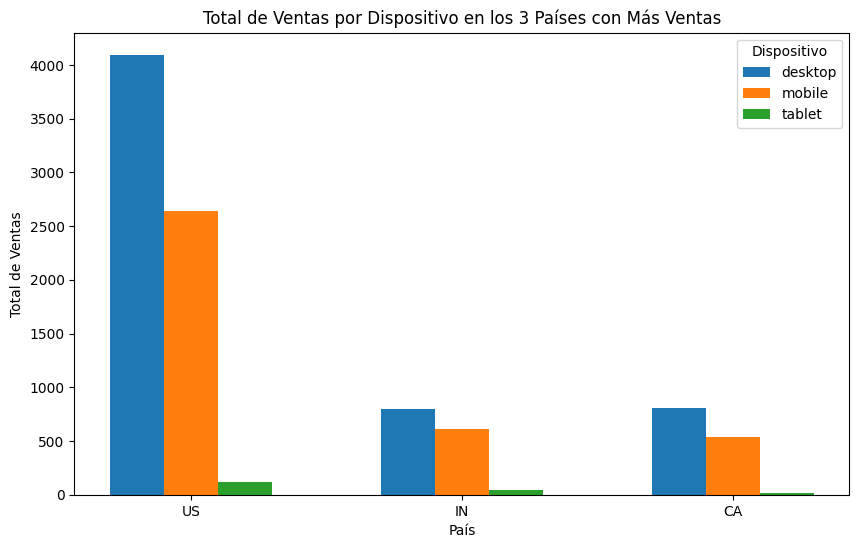

In [90]:
countries = device_sales_df.index
devices = device_sales_df.columns
bar_width = 0.2
x = np.arange(len(countries))

plt.figure(figsize=(10, 6))

for i, device in enumerate(devices):
    plt.bar(x + i * bar_width, device_sales_df[device], width=bar_width, label=device)

plt.xlabel("País")
plt.ylabel("Total de Ventas")
plt.title("Total de Ventas por Dispositivo en los 3 Países con Más Ventas")
plt.xticks(x + bar_width, countries)
plt.legend(title="Dispositivo")

plt.show()


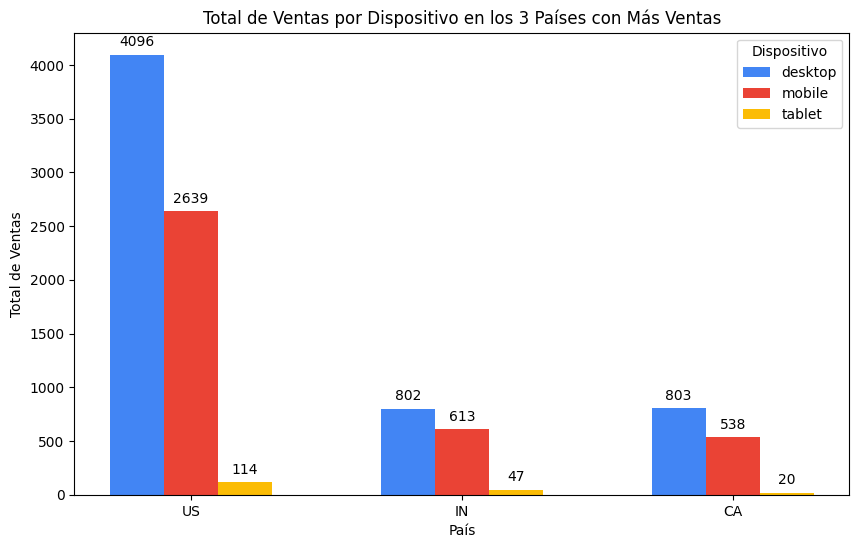

In [93]:
device_sales_df = device_sales_df.T
countries = device_sales_df.index
devices = device_sales_df.columns
bar_width = 0.2
x = np.arange(len(countries))

google_colors = ["#4285F4", "#EA4335", "#FBBC05"] 

plt.figure(figsize=(10, 6))

for i, device in enumerate(devices):
    bars = plt.bar(x + i * bar_width, device_sales_df[device], width=bar_width, color=google_colors[i], label=device)
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, int(yval), ha='center', va='bottom')


plt.xlabel("País")
plt.ylabel("Total de Ventas")
plt.title("Total de Ventas por Dispositivo en los 3 Países con Más Ventas")
plt.xticks(x + bar_width, countries)
plt.legend(title="Dispositivo")


plt.show()


/var/folders/84/72r4wyw142g7t01rb5n314yc0000gn/T/ipykernel_82580/2340753262.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_events['date'] = pd.to_datetime(purchase_events['date'], errors='coerce', format='%d/%m/%y %H:%M')
/var/folders/84/72r4wyw142g7t01rb5n314yc0000gn/T/ipykernel_82580/2340753262.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_events['month'] = purchase_events['date'].dt.month


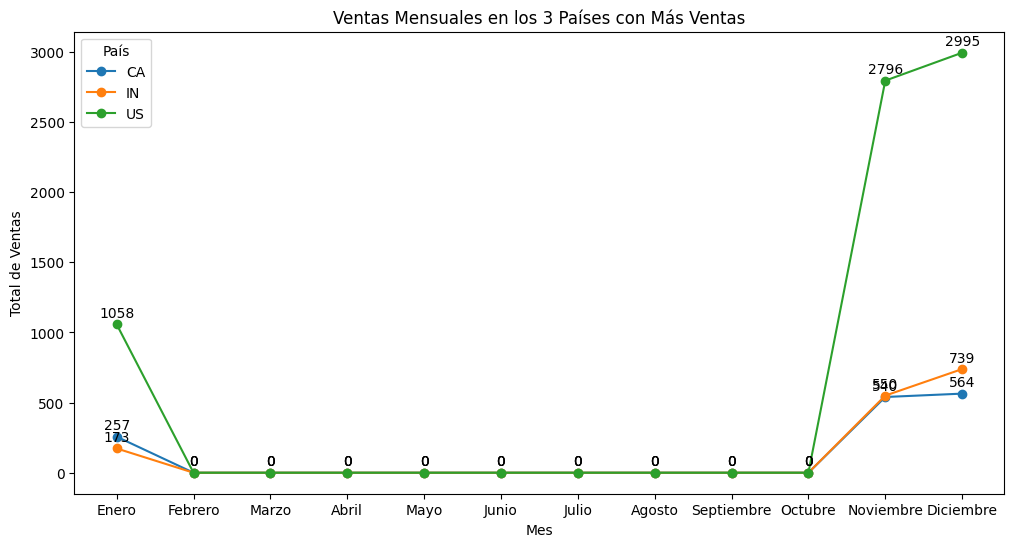

In [101]:

events_data = pd.read_csv('/Users/joseluissenaarbona/Desktop/EDA/events_merch.csv')

# Dividir la columna única en subcolumnas
events_data[['user_id', 'ga_session_id', 'country', 'device', 'type', 'item_id', 'date']] = \
    events_data['user_id;ga_session_id;country;device;type;item_id;date'].str.split(';', expand=True)

# Filtrar solo los eventos de compra
purchase_events = events_data[events_data['type'] == 'purchase']

# Identificar los 3 países con más ventas
top_countries = purchase_events['country'].value_counts().head(3).index

# Convertir la columna 'date' a formato datetime para extraer el mes
purchase_events['date'] = pd.to_datetime(purchase_events['date'], errors='coerce', format='%d/%m/%y %H:%M')
purchase_events['month'] = purchase_events['date'].dt.month

# Filtrar los datos solo para los tres países principales
top_country_sales = purchase_events[purchase_events['country'].isin(top_countries)]

# Agrupar por país y mes y contar las ventas, asegurándose de que todos los meses de 1 a 12 estén presentes
monthly_sales = top_country_sales.groupby(['country', 'month']).size().unstack(fill_value=0).reindex(columns=range(1, 13), fill_value=0)

# Crear la gráfica de líneas para mostrar ventas mensuales en los 3 países con más ventas
plt.figure(figsize=(12, 6))

for country in monthly_sales.index:
    plt.plot(monthly_sales.columns, monthly_sales.loc[country], marker='o', label=country)
    
    # Añadir el número de ventas encima de cada punto
    for month, sales in monthly_sales.loc[country].items():
        plt.text(month, sales + 50, str(sales), ha='center')

# Etiquetas y título
plt.xlabel("Mes")
plt.ylabel("Total de Ventas")
plt.title("Ventas Mensuales en los 3 Países con Más Ventas")
plt.xticks(ticks=range(1, 13), labels=["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", 
                                       "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])
plt.legend(title="País")

# Mostrar la gráfica
plt.show()






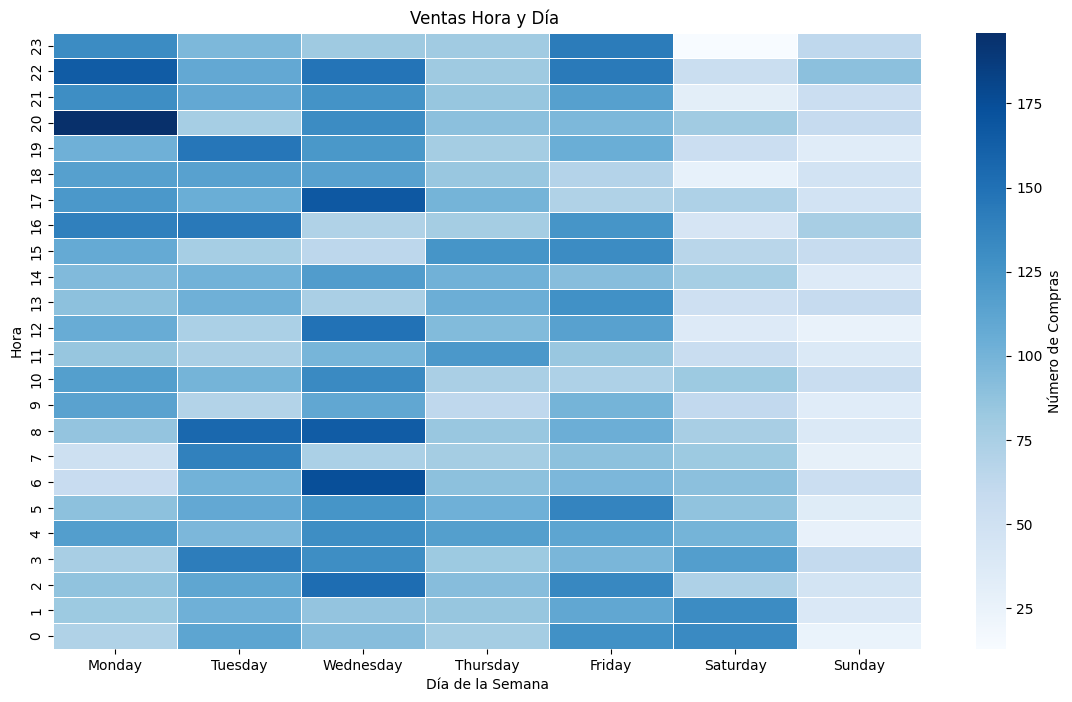

In [107]:


events_data[['user_id', 'ga_session_id', 'country', 'device', 'type', 'item_id', 'date']] = \
    events_data['user_id;ga_session_id;country;device;type;item_id;date'].str.split(';', expand=True)

events_data['date'] = pd.to_datetime(events_data['date'], errors='coerce', format='%d/%m/%y %H:%M')

events_data['day_of_week'] = events_data['date'].dt.day_name()
events_data['hour_of_day'] = events_data['date'].dt.hour

purchase_events = events_data[events_data['type'] == 'purchase']

weekday_hourly_distribution = purchase_events.groupby(['day_of_week', 'hour_of_day']).size().unstack()
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_hourly_distribution = weekday_hourly_distribution.reindex(days_order, axis=0)
weekday_hourly_distribution = weekday_hourly_distribution.sort_index(axis=1) 

plt.figure(figsize=(14, 8))
sns.heatmap(weekday_hourly_distribution.T, cmap="Blues", cbar_kws={'label': 'Número de Compras'}, linewidths=0.5)
plt.xlabel('Día de la Semana')
plt.ylabel('Hora')
plt.title('Ventas Hora y Día ')
plt.gca().invert_yaxis()
plt.show()
